In [279]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import re

In [280]:
df = pd.read_csv('/Users/jayeshpatel/Documents/Jupyter Notebook/laptop_price - dataset.csv')

In [281]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


## EDA

In [282]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [283]:
df.dtypes

Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
CPU_Company             object
CPU_Type                object
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
dtype: object

In [284]:
df.shape

(1275, 15)

In [285]:
# Is there any Duplicate Values
df.duplicated().sum()

0

In [286]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [287]:
df.columns = df.columns.str.strip()

In [288]:
df.rename(columns={'Price (Euro)': 'Price'}, inplace=True)

In [289]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [12]:
# df.drop([''])

In [89]:
# # Get the count of each company
# company_counts = df['Company'].value_counts()

# # Replace companies that appear fewer than 7 times with 'Other'
# df['Company'] = df['Company'].apply(lambda x: 'Other' if company_counts[x] < 8 else x)

# # Check the result
# print(df['Company'].unique())  # To see unique companies after replacement


['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Other' 'MSI' 'Toshiba'
 'Samsung']


/Users/jayeshpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


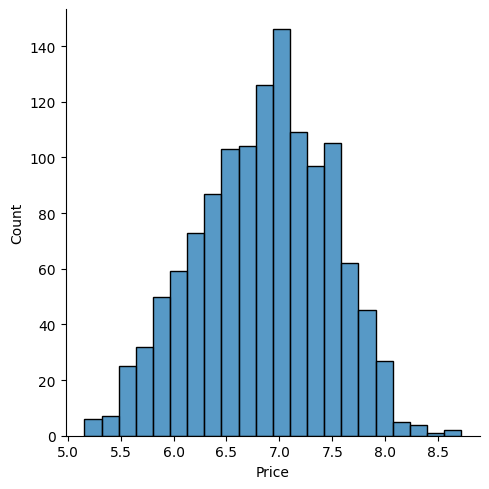

In [290]:
sns.displot(np.log(df['Price']))

## Company

In [303]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

## Product

In [304]:
df.drop(['Product'],axis=1,inplace=True)

## TypeName

In [305]:
df['TypeName'].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [306]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,cpu
1086,HP,Workstation,15.6,Full HD 1920x1080,2.5,8,256GB SSD,AMD,FirePro W4190M,Windows 7,1.9,1495.00,Core i7
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,1.1,2,32GB Flash Storage,Intel,HD Graphics 500,Windows 10,1.1,275.00,other intel
543,Acer,Gaming,15.6,Full HD 1920x1080,2.5,8,1TB HDD,Nvidia,GeForce GTX 1050,Linux,2.4,798.00,Core i5
899,Dell,Notebook,15.6,Full HD 1920x1080,2.6,8,500GB HDD,Intel,HD Graphics 620,Windows 10,1.9,935.00,Core i5
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,2.5,6,1TB HDD,Intel,HD Graphics 620,Windows 10,1.5,639.01,Core i5


## Inches

## ScreenResolution

In [307]:
df['Display_name'] = df['ScreenResolution'].str.extract(r'([A-Za-z\s]+)')
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [308]:
df['Resolution'].value_counts()

Resolution
1920x1080    833
1366x768     290
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      3
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [309]:
# Split the 'Resolution' column into two new columns: 'Width' and 'Height'
df[['x_res', 'y_res']] = df['Resolution'].str.split('x', expand=True)

# Convert the columns to integers (optional, if needed for calculations)
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)

In [120]:
# df.drop(['Resolution'],axis=1,inplace=True)

In [121]:
# df.drop(['R_Width','R_Height','Resolution'],axis=1)

In [310]:
df['Display_name'].value_counts()

Display_name
Full HD                      552
x                            296
IPS Panel Full HD            282
Touchscreen                   35
IPS Panel                     34
Quad HD                       18
IPS Panel Retina Display      17
K Ultra HD                    17
IPS Panel Touchscreen         14
IPS Panel Quad HD              9
Name: count, dtype: int64

In [311]:
df['ips_pannel'] = df['Display_name'].apply(lambda x : 1 if 'IPS' in x else 0)

<Axes: xlabel='ips_pannel', ylabel='Price'>

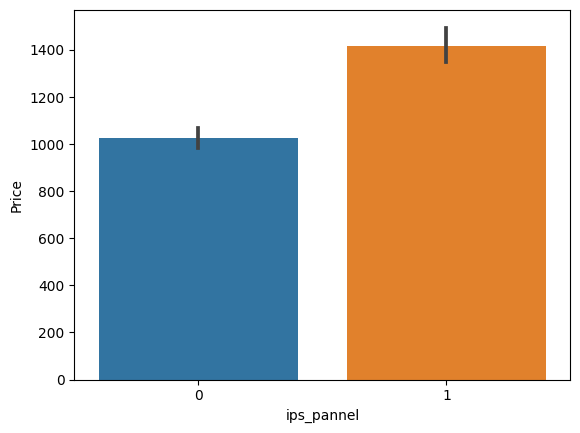

In [312]:
sns.barplot(x=df['ips_pannel'],y=df['Price'])

In [313]:
# Find PPI
df['ppi'] = ((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches'].astype('float')

In [314]:
df.drop(['Display_name','x_res','y_res','Inches','Resolution'],inplace=True,axis=1)

In [315]:
df.drop(['ScreenResolution'],inplace=True,axis=1)

In [316]:
df.sample(5)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,cpu,ips_pannel,ppi
275,Dell,Notebook,2.7,12,1TB HDD,Intel,HD Graphics 620,Windows 10,2.30,713.07,Core i7,0,100.454670
841,Dell,Gaming,2.8,32,512GB SSD + 1TB HDD,Nvidia,GeForce GTX 1070,Windows 10,4.42,3072.89,Core i7,1,127.335675
114,Dell,Ultrabook,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.21,1629.00,Core i5,1,165.632118
231,HP,Notebook,1.5,4,500GB HDD,AMD,Radeon R2,Windows 10,2.10,330.00,AMD,0,100.454670
804,Dell,Netbook,1.1,4,128GB SSD,Intel,HD Graphics 505,Windows 10,1.63,744.00,other intel,0,135.094211


## CPU_Company

In [317]:
# df['CPU_Company'].value_counts()

## CPU_Type

In [39]:
# # Get the value counts for 'CPU_Type'
# value_counts = df['CPU_Type'].value_counts()

# # Filter the DataFrame to include only CPU_Type values with counts less than 5
# filtered_df = df[df['CPU_Type'].isin(value_counts[value_counts < 5].index)]
# filtered_df


In [291]:
# df['CPU_Type'].str.replace('-',' ')

In [133]:
# d.to_csv('/Users/jayeshpatel/Documents/Jupyter Notebook/laptop_price - dataset_new.csv')

In [292]:
# df['CPU_Type'].apply(lambda x: x.split())

In [293]:
df[['Processor_Type', 'Model_Number']] = df['CPU_Type'].str.extract(r'(.+)\s+(\w+\s?\d+[A-Za-z]?)')

In [294]:
df['Processor_Type'].value_counts()

Processor_Type
Core i7              511
Core i5              411
Core i3              134
Celeron Dual Core     70
Pentium Quad Core     27
Core                  16
A9-Series             15
Atom                  13
Core M                13
A6-Series             11
E-Series               9
A12-Series             8
Celeron Quad Core      8
A10-Series             6
Ryzen                  4
A8-Series              4
Pentium Dual Core      3
FX                     2
Xeon E3-1505M          2
Xeon E3-1535M          2
A4-Series              1
Cortex                 1
Name: count, dtype: int64

In [295]:
def processer_spliter(i):
    if i == 'Core i7' or i == 'Core i5' or i == 'Core i3':
        return i
    elif i == 'Celeron Dual Core' or i == 'Celeron Quad Core' or i == 'Pentium Quad Core' or i == '' or i == 'Atom' or i == 'Core M' or i == 'Pentium Dual Core' or i == 'Xeon E3-1505M' or i == 'Xeon E3-1535M':
        return 'other intel'
    else:
        return 'AMD'
        

In [296]:
df = df[df['CPU_Company']!='Samsung']

In [297]:
df['Processor_Type'] = df['Processor_Type'].str.strip()

In [298]:
df['cpu'] =df['Processor_Type'].apply(processer_spliter)

<Axes: xlabel='cpu'>

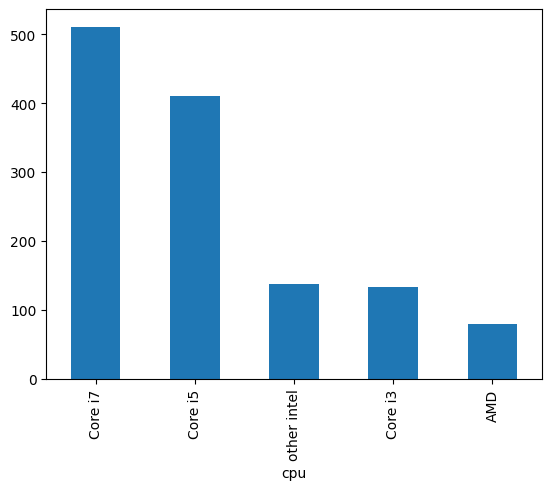

In [299]:
df['cpu'].value_counts().plot(kind='bar')

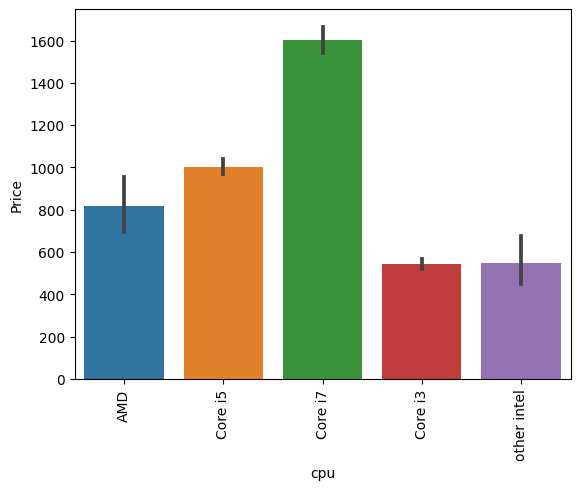

In [300]:
sns.barplot(x=df['cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [301]:
df.drop(['CPU_Company','CPU_Type','Processor_Type','Model_Number'],inplace=True,axis=1)

In [318]:
df.sample(5)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,cpu,ips_pannel,ppi
607,Lenovo,Notebook,2.5,6,1TB HDD,Intel,HD Graphics 620,Windows 10,2.40,564.00,Core i5,0,141.211998
358,Dell,Notebook,2.5,8,2TB HDD,Intel,HD Graphics 620,Windows 10,2.36,557.37,Core i5,0,100.454670
415,Dell,Notebook,2.5,4,256GB SSD,AMD,Radeon R5 M430,Linux,2.30,598.90,Core i5,0,141.211998
880,HP,2 in 1 Convertible,2.5,4,256GB SSD,Intel,HD Graphics 620,Windows 10,1.28,1700.00,Core i5,0,165.632118
757,HP,Workstation,2.6,8,256GB SSD,Nvidia,Quadro M1000M,Windows 7,2.59,1561.00,Core i7,0,141.211998


## CPU_Frequency (GHz)

<Axes: xlabel='CPU_Frequency (GHz)', ylabel='Price'>

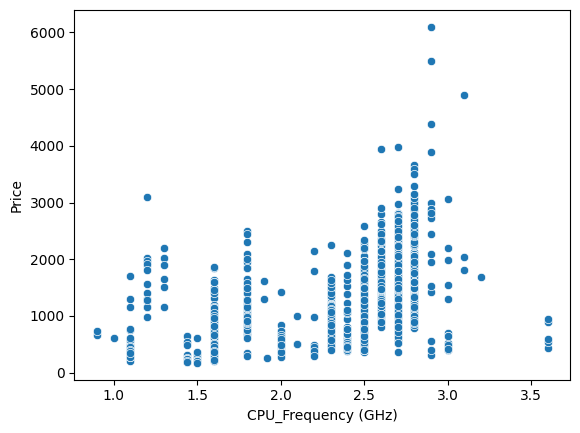

In [319]:
sns.scatterplot(x=df['CPU_Frequency (GHz)'],y=df['Price'])

## RAM (GB)

<Axes: xlabel='RAM (GB)', ylabel='Price'>

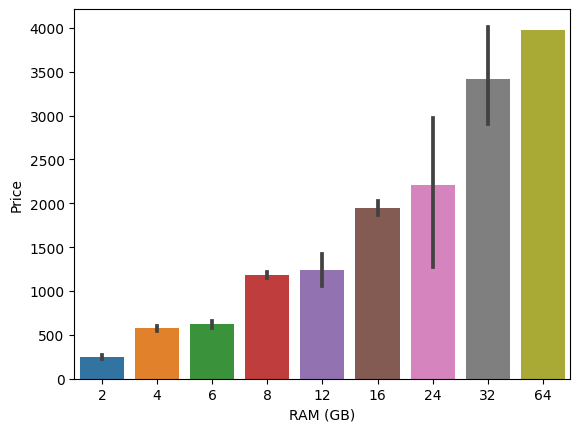

In [321]:
sns.barplot(x=df['RAM (GB)'],y=df['Price'])

## Memory

In [322]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [323]:
df['Memory'] = df['Memory'].str.replace(r'\.0', '', regex=True)

In [324]:
# Function to process the memory column
def memory_summation(memory):
    # Split the string by '+'
    parts = memory.split('+')
    
    # Extract the numbers and types (SSD, HDD, Flash Storage) for each part
    memory_values = []
    for part in parts:
        match = re.match(r'(\d+)(GB|TB)\s*(SSD|HDD|Flash Storage|Hybrid)', part.strip())
        if match:
            size, unit, type_ = match.groups()
            size = float(size) * (1000 if unit == 'TB' else 1)  # Convert TB to GB for summation
            memory_values.append((size, type_))
    
    # Check if both parts are of the same type (SSD + SSD or HDD + HDD or Flash Storage + Flash Storage)
    if len(memory_values) == 2 and memory_values[0][1] == memory_values[1][1]:
        total_memory = memory_values[0][0] + memory_values[1][0]  # Sum the sizes
        return f'{int(total_memory)}GB {memory_values[0][1]}'
    else:
        # If parts are different types, return original but with TB converted to GB
        converted_parts = []
        for size, type_ in memory_values:
            converted_parts.append(f'{int(size)}GB {type_}')
        return ' + '.join(converted_parts)

In [325]:
# Apply the function to the Memory column
df['Memory'] = df['Memory'].apply(memory_summation)

In [326]:
def memory_distribution_ssd(i):
    # Split the string by '+'
    parts = i.split('+')
    
    # Loop through the parts to check for 'SSD'
    for part in parts:
        if 'SSD' in part.strip():
            # Use regex to extract numeric value (e.g., 256, 512, etc.)
            match = re.search(r'(\d+)', part.strip())
            if match:
                return int(match.group(1))  # Return the extracted number as an integer
    return 0  # Return 0 if no part contains 'SSD'
def memory_distribution_hdd(i):
    parts = i.split('+')
    for part in parts:
        if 'HDD' in part.strip():
            # Use regex to extract numeric value (e.g., 256, 512, etc.)
            match = re.search(r'(\d+)', part.strip())
            if match:
                return int(match.group(1))  # Return the extracted number as an integer
    return 0  

def memory_distribution_hybrid(i):
    parts = i.split('+')
    for part in parts:
        if 'Hybrid' in part.strip():
                        # Use regex to extract numeric value (e.g., 256, 512, etc.)
            match = re.search(r'(\d+)', part.strip())
            if match:
                return int(match.group(1))  # Return the extracted number as an integer
    return 0  


def memory_distribution_flash(i):
    parts = i.split('+')
    for part in parts:
        if 'Flash Storage' in part.strip():
            # Use regex to extract numeric value (e.g., 256, 512, etc.)
            match = re.search(r'(\d+)', part.strip())
            if match:
                return int(match.group(1))  # Return the extracted number as an integer
    return 0  

In [327]:
df['ssd'] = df['Memory'].apply(memory_distribution_ssd)

In [328]:
df['hdd'] = df['Memory'].apply(memory_distribution_hdd)

In [329]:
df['hybrid'] = df['Memory'].apply(memory_distribution_hybrid)

In [335]:
df['flash_storage'] = df['Memory'].apply(memory_distribution_flash)

In [331]:
df['ssd'].value_counts()

ssd
256     498
0       437
128     170
512     134
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64

In [332]:
df['hdd'].value_counts()

hdd
0       714
1000    400
500     126
2000     32
32        1
128       1
Name: count, dtype: int64

In [333]:
df['hybrid'].value_counts()

hybrid
0       1264
1000       9
508        1
Name: count, dtype: int64

In [336]:
df['flash_storage'].value_counts()

flash_storage
0      1204
32       35
64       14
256       8
16        7
128       4
512       2
Name: count, dtype: int64

In [234]:
# df.to_csv('leptop_check.csv')

In [338]:
df.drop(['Memory','Flash_storage'],axis=1,inplace=True)

In [340]:
df.sample(5)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price,cpu,ips_pannel,ppi,ssd,hdd,hybrid,flash_storage
1147,Dell,Notebook,2.7,8,Nvidia,GeForce 940MX,Windows 10,2.18,1009.9,Core i7,0,141.211998,256,0,0,0
303,Lenovo,Notebook,2.5,8,Nvidia,GeForce 940MX,No OS,2.20,549.0,Core i5,0,100.454670,0,2000,0,0
348,Asus,2 in 1 Convertible,1.1,4,Intel,HD Graphics 500,Windows 10,1.50,375.0,other intel,0,135.094211,0,0,0,32
177,MSI,Gaming,2.9,32,Nvidia,GTX 980 SLI,Windows 10,4.40,2799.0,Core i7,0,119.723216,512,1000,0,0
1117,Razer,Ultrabook,2.5,8,Intel,HD Graphics 520,Windows 10,1.25,1029.0,Core i7,0,352.465147,256,0,0,0


## GPU_Company

In [341]:
df['GPU_Company'].value_counts()

GPU_Company
Intel     704
Nvidia    396
AMD       174
Name: count, dtype: int64

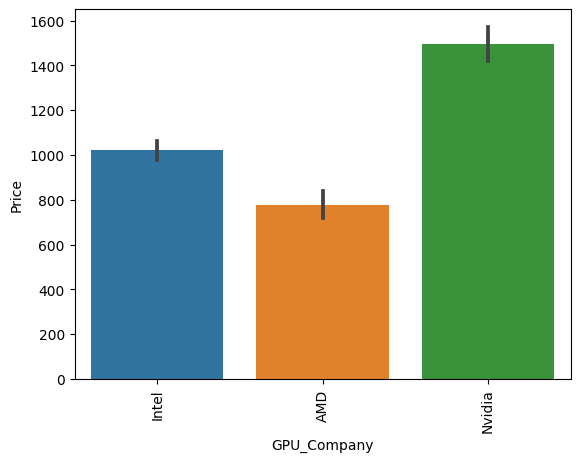

In [344]:
sns.barplot(x=df['GPU_Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## GPU_Type

In [345]:
df.drop(['GPU_Type'], axis=1, inplace=True)

In [346]:
df.sample(5)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),GPU_Company,OpSys,Weight (kg),Price,cpu,ips_pannel,ppi,ssd,hdd,hybrid,flash_storage
426,Dell,Notebook,1.8,8,AMD,Windows 10,2.02,1142.40,Core i7,0,141.211998,256,2000,0,0
1102,Acer,Notebook,1.5,4,Intel,Chrome OS,2.20,209.00,other intel,0,100.454670,16,0,0,0
618,MSI,Gaming,2.8,16,Nvidia,Windows 10,2.94,2267.86,Core i7,0,141.211998,256,1000,0,0
155,HP,Notebook,1.6,6,AMD,Windows 10,1.91,619.00,Core i5,0,141.211998,256,0,0,0
461,Acer,Netbook,1.6,4,Intel,Windows 10,1.40,435.00,other intel,0,135.094211,128,0,0,0


## OpSys

In [347]:
df['OpSys'].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [348]:
df['OpSys'] = df['OpSys'].replace('Mac OS X','macOS')

In [349]:
df['OpSys'] = df['OpSys'].replace('Windows 10 S','Windows 10')

In [350]:
def os_transform (i):
    if i == 'Windows 10' or i == 'Windows 7':
        return 'Windows'
    elif i == 'macOS':
        return 'Macos'
    else:
        return 'Otheros'

In [351]:
df['os'] = df['OpSys'].apply(os_transform)

In [352]:
df['os'].value_counts()

os
Windows    1101
Otheros     152
Macos        21
Name: count, dtype: int64

In [353]:
df.drop(['OpSys'],axis=1,inplace=True)

In [354]:
df.sample(5)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),GPU_Company,Weight (kg),Price,cpu,ips_pannel,ppi,ssd,hdd,hybrid,flash_storage,os
12,Apple,Ultrabook,2.8,16,AMD,1.83,2439.97,AMD,1,220.534624,256,0,0,0,Macos
681,Asus,Notebook,1.1,4,Intel,1.86,419.00,other intel,0,100.454670,128,0,0,0,Windows
85,Dell,Gaming,2.8,16,Nvidia,2.65,1349.00,Core i7,1,141.211998,128,1000,0,0,Windows
763,Asus,Ultrabook,2.5,8,Intel,1.20,1129.00,Core i5,1,276.053530,256,0,0,0,Windows
881,HP,2 in 1 Convertible,2.5,4,Intel,2.30,684.80,Core i5,0,100.454670,0,500,0,0,Windows


## Weight (kg)

<Axes: xlabel='Weight (kg)', ylabel='Price'>

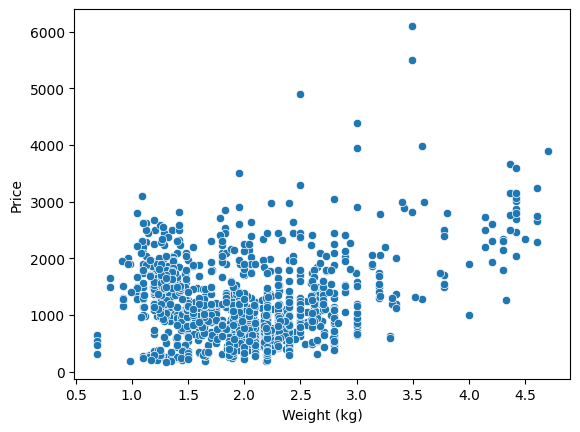

In [355]:
sns.scatterplot(x=df['Weight (kg)'],y=df['Price'])

## Price

/var/folders/nc/r36nhgd97lbcs7vxcz4qxqc00000gn/T/ipykernel_17060/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
/Users/jayeshpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

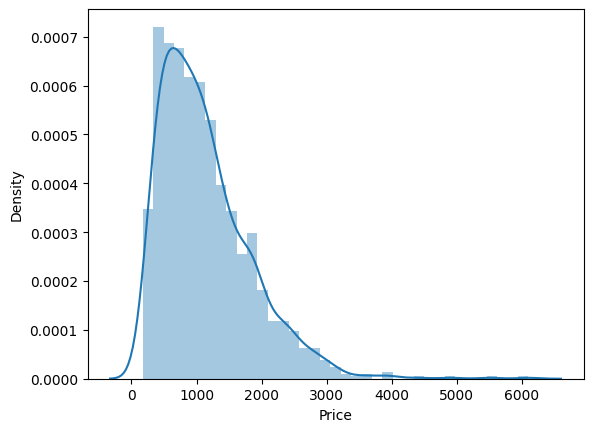

In [364]:
sns.distplot(df['Price'])

/var/folders/nc/r36nhgd97lbcs7vxcz4qxqc00000gn/T/ipykernel_17060/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
/Users/jayeshpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

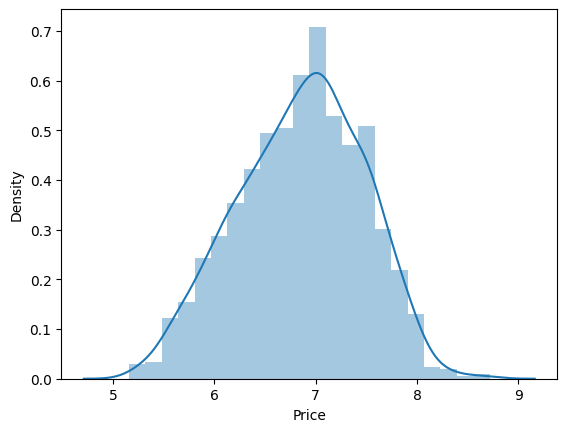

In [365]:
sns.distplot(np.log(df['Price']))

In [366]:
df['Price'] = np.log(df['Price'])

## ML

In [356]:
df.to_csv('df_final.csv')

In [367]:
X = df.drop('Price', axis=1)
X

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),GPU_Company,Weight (kg),cpu,ips_pannel,ppi,ssd,hdd,hybrid,flash_storage,os
0,Apple,Ultrabook,2.3,8,Intel,1.37,AMD,1,226.983005,128,0,0,0,Macos
1,Apple,Ultrabook,1.8,8,Intel,1.34,AMD,0,127.677940,0,0,0,128,Macos
2,HP,Notebook,2.5,8,Intel,1.86,Core i5,0,141.211998,256,0,0,0,Otheros
3,Apple,Ultrabook,2.7,16,AMD,1.83,AMD,1,220.534624,512,0,0,0,Macos
4,Apple,Ultrabook,3.1,8,Intel,1.37,AMD,1,226.983005,256,0,0,0,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,2.5,4,Intel,1.80,Core i7,1,157.350512,128,0,0,0,Windows
1271,Lenovo,2 in 1 Convertible,2.5,16,Intel,1.30,Core i7,1,276.053530,512,0,0,0,Windows
1272,Lenovo,Notebook,1.6,2,Intel,1.50,other intel,0,111.935204,0,0,0,64,Windows
1273,HP,Notebook,2.5,6,AMD,2.19,Core i7,0,100.454670,0,1000,0,0,Windows


In [368]:
y = df['Price']
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1270    6.458338
1271    7.312553
1272    5.433722
1273    6.638568
1274    5.910797
Name: Price, Length: 1274, dtype: float64

In [369]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [370]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [401]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [377]:
x_train.sample(1)

,Company,TypeName,CPU_Frequency (GHz),RAM (GB),GPU_Company,Weight (kg),cpu,ips_pannel,ppi,ssd,hdd,hybrid,flash_storage,os
688,HP,Notebook,2.4,6,AMD,2.65,AMD,1,127.335675,0,2000,0,0,Windows


### Linear regression

In [380]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8012915049719165
MAE 0.20871282285527493


### Ridge

In [384]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8007793655100556
MAE: 0.2101251553259427


### Lasso

In [388]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.7979433870048743
MAE: 0.20858519737235467


### KNN

In [389]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.7946558731205192
MAE: 0.19309220673282124


### DT

In [395]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=12)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8254498826774515
MAE: 0.18954771910684584


### SVM

In [396]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8195067379935703
MAE: 0.19543289117295715


### Random Forest

In [426]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=150,
                              random_state=4,
                              max_samples=0.9,
                              max_features=0.9,
                              max_depth=15)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(x_train,y_train)
y_pred = pipe_rf.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8807959915475343
MAE: 0.16053393099291743


### Extra Trees

In [399]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                            bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.877752840660447
MAE: 0.16275587953632722


### Voting Regressor

In [424]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=150,random_state=4,max_samples=0.9,max_features=0.9,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8837086115326604
MAE: 0.1592470174180625


### Stacking

In [404]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,6,13])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score 0.8758928813709963
MAE: 0.1636832987613065


### Pickle

In [427]:
import pickle

In [428]:
pickle.dump(df,open('df.pkl','wb'))

In [429]:
pickle.dump(pipe_rf,open('pipe.pkl','wb'))